<a href="https://colab.research.google.com/github/Kesavika-abi/Data_Science/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('/content/Ice Cream.csv')
print(df.tail())
print(df.head())

     Temperature  Revenue
495         22.3      525
496         32.9      756
497         12.6      307
498         22.4      567
499         29.0      656
   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None

Summary Statistics:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000

Missing Values:
Temperature    0
Revenue        0
dtype: int64


In [5]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())

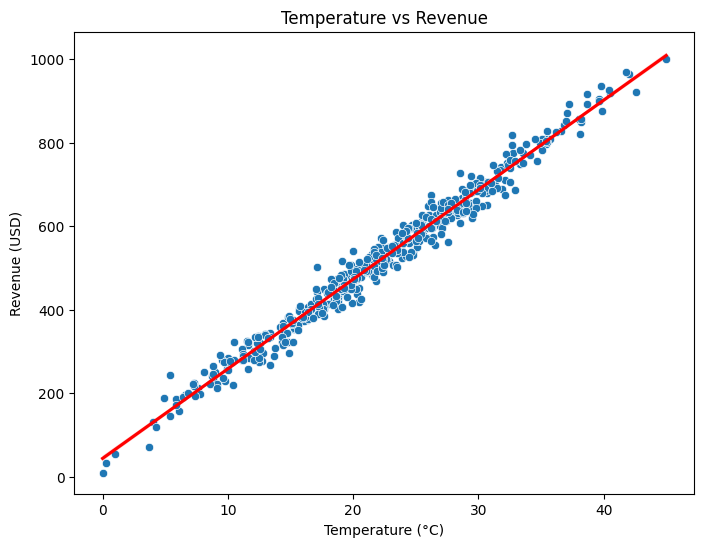

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature', y='Revenue')
sns.regplot(data=df, x='Temperature', y='Revenue', scatter=False, color='red')
plt.title('Temperature vs Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (USD)')
plt.show()

In [20]:
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
             Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


In [8]:
X = df[['Temperature']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr_model.predict(X_test)

In [17]:
print("\nLinear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
MAE: 19.195652579103704
RMSE: 25.543958747446354
R² Score: 0.9771509516333023


In [19]:
print("\nInsights:")
print("→ Revenue tends to increase with temperature.")
print("→ Use model output to forecast demand and plan marketing strategies.")


Insights:
→ Revenue tends to increase with temperature.
→ Use model output to forecast demand and plan marketing strategies.


In [22]:
#Predict revenue when temperature is 28°C
temperature_value = 28
predicted_revenue = lr_model.predict([[temperature_value]])

print(f"Predicted Revenue for {temperature_value}°C: {predicted_revenue[0]:.2f}")


Predicted Revenue for 28°C: 644.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
